In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problema:
Para melhorar sua concessão de crédito, um banco quer prever quando é a renda mensal dos seus clientes, mesmo considerando que eles podem movimentar contas de outros bancos, e mesmo que eles não declarem ou tragam comprovante

# Variáveis:
 - age: Idade
 - NumberOfDependents: Quantidade de dependentes informados pelo cliente
 - RevolvingUtilizationOfUnsecuredLines: Total de crédito tomado sem garantia 
 - DebtRatio: Razão da dívida pelo patrimônio
 - NumberOfOpenCreditLinesAndLoans: Número total de empréstimos tomados
 - NumberOfTime30-59DaysPastDueNotWorse: Número de vezes que o cliente ficou entre 30 e 59 dias em atraso
 - NumberOfTime60-89DaysPastDueNotWorse: Número de vezes que o cliente ficou entre 60 e 89 dias em atraso
 - NumberOfTimes90DaysLate: Número de vezes que o cliente atrasou ficou mais de 90 dias em atraso
 - NumberRealEstateLoansOrLines: Quantidade de financiamentos imobliários do cliente

# Variável resposta:
 - MonthlyIncome: Renda mensal
 
## Estratégia: Inferência de Rejeitados

A inferência de rejeitados é o processo de estimar o risco de inadimplência dos indivıduos que foram rejeitados em uma operação de crédito.

In [4]:
df = pd.read_csv('../../DataSets/base_banco.csv')
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,9120.0,13,0,6,0,2.0
1,0.957151,40,0,2600.0,4,0,0,0,1.0
2,0.658180,38,1,3042.0,2,1,0,0,0.0
3,0.233810,30,0,3300.0,5,0,0,0,0.0
4,0.907239,49,1,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
120264,0.385742,50,0,3400.0,7,0,0,0,0.0
120265,0.040674,74,0,2100.0,4,0,1,0,0.0
120266,0.299745,44,0,5584.0,4,0,1,0,2.0
120267,0.000000,30,0,5716.0,4,0,0,0,0.0


# O que queremos prever?
Renda!

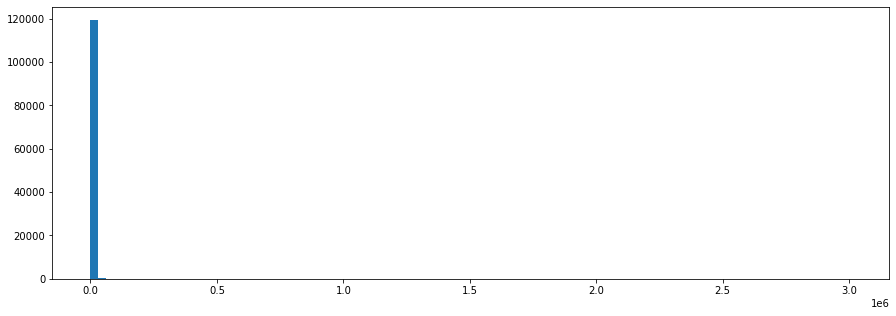

In [5]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=100);

In [6]:
np.logspace(0,3,10)

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

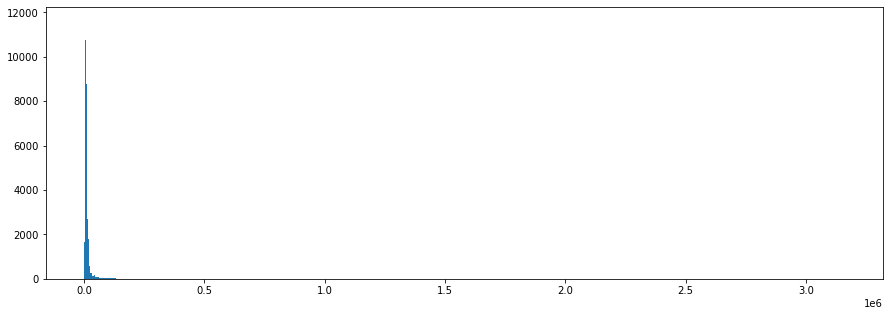

In [7]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0,6.5,100));

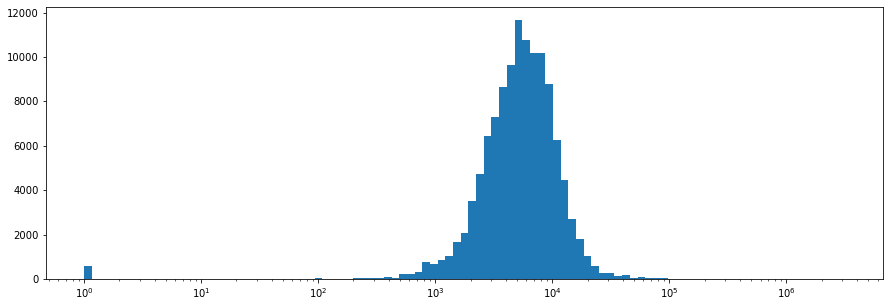

In [9]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0,6.5,100));
plt.xscale('log')

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

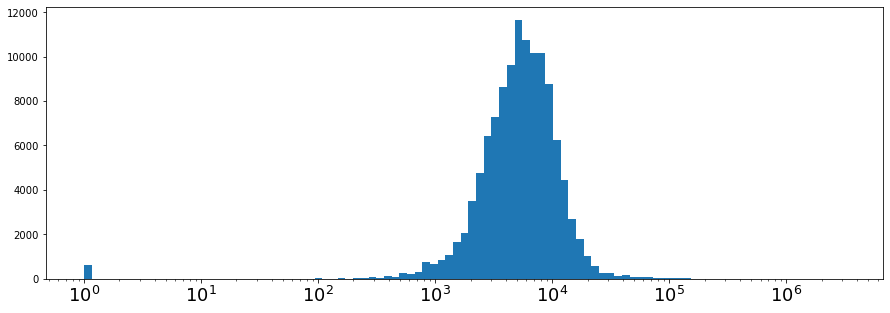

In [8]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0,6.5,100));
plt.xscale('log')
plt.xticks(fontsize=18)

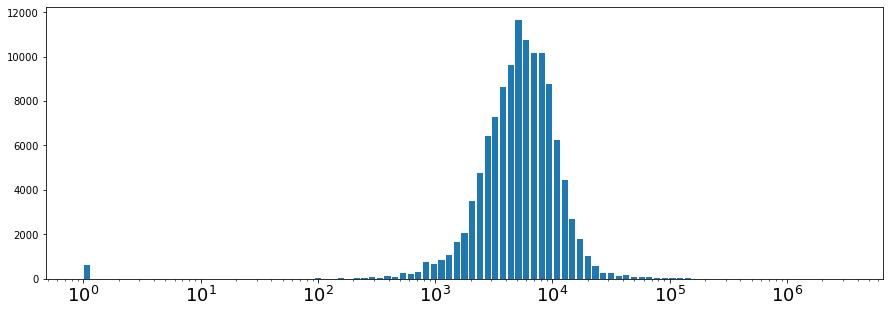

In [11]:
plt.figure(figsize=(15,5))
plt.hist(df.MonthlyIncome, bins=np.logspace(0,6.5,100), rwidth=.8);
plt.xscale('log') # Colocou em escala logarítmica o eixo x
plt.xticks(fontsize=18);

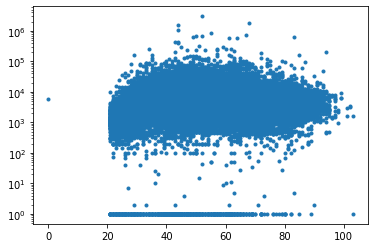

In [12]:
plt.plot(df.age, df.MonthlyIncome, '.')
plt.yscale('log') # Colocou em escala logarítmica o eixo y

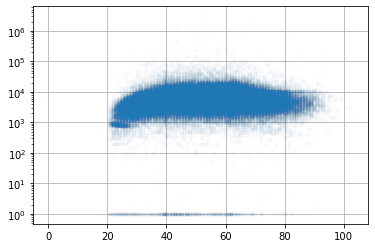

In [15]:
plt.plot(df.age, df.MonthlyIncome, '.', alpha=0.01) # alpha=0.01 = põe um pouco de transparência
plt.yscale('log')
plt.grid()

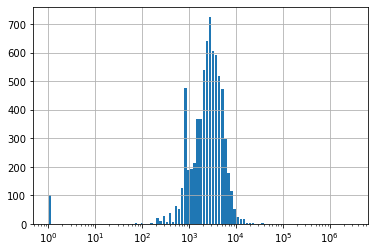

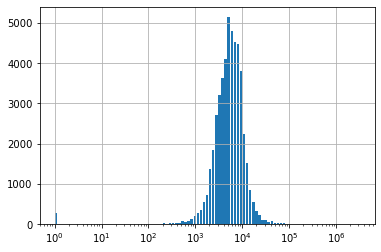

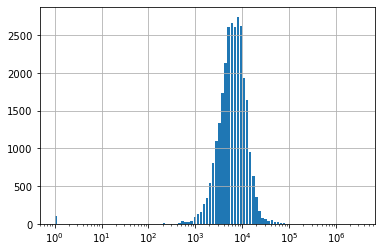

In [14]:
plt.figure()
plt.hist(df.loc[(df.age>=20) & (df.age<30)].MonthlyIncome, bins=np.logspace(0,6.5,100), rwidth=.8)
plt.xscale('log')
plt.grid()

plt.figure()
plt.hist(df.loc[(df.age>=30) & (df.age<50)].MonthlyIncome, bins=np.logspace(0,6.5,100), rwidth=.8)
plt.xscale('log')
plt.grid()

plt.figure()
plt.hist(df.loc[(df.age>=50) & (df.age<60)].MonthlyIncome, bins=np.logspace(0,6.5,100), rwidth=.8)
plt.xscale('log')
plt.grid()

# Separar em variáveis preditivas e variável resposta

In [15]:
X = df.drop('MonthlyIncome', axis=1)
y = df.MonthlyIncome

# Separação em treino e teste

In [16]:
X.shape

(120269, 8)

In [17]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

# Treinar o modelo

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestRegressor(max_depth=8, n_estimators=500, n_jobs=-1)

In [19]:
y_ts

32009     4500.0
21897     3000.0
76272     8400.0
64186    10600.0
26382     3290.0
          ...   
36684     5600.0
21101    10500.0
5504      5700.0
66119    12166.0
52678     3150.0
Name: MonthlyIncome, Length: 36081, dtype: float64

In [20]:
rf.predict(X_ts)

array([4441.16164574, 9699.60890651, 7294.78646433, ..., 4429.26943205,
       5832.47018017, 6416.0072423 ])

In [21]:
erro = y_ts - rf.predict(X_ts)
erro

32009      58.838354
21897   -6699.608907
76272    1105.213536
64186    3239.656658
26382   -3112.250209
            ...     
36684   -3740.345056
21101    4232.654868
5504     1270.730568
66119    6333.529820
52678   -3266.007242
Name: MonthlyIncome, Length: 36081, dtype: float64

In [22]:
erro.mean()

-169.59522083430676

In [23]:
erro_abs = np.abs(y_ts - rf.predict(X_ts))
erro_abs

32009      58.838354
21897    6699.608907
76272    1105.213536
64186    3239.656658
26382    3112.250209
            ...     
36684    3740.345056
21101    4232.654868
5504     1270.730568
66119    6333.529820
52678    3266.007242
Name: MonthlyIncome, Length: 36081, dtype: float64

In [24]:
erro_abs.mean()

3205.6470187993345

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, rf.predict(X_ts))

3205.6470187993095

# Relembrando

# Como comparar histogramas: 
## 1) Colocar na mesma escala
## 2) Colocar no mesmo gráfico
## 3) Melhorar o visual

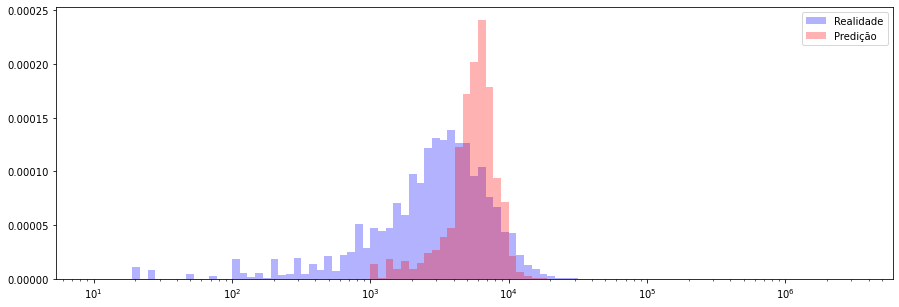

In [28]:
plt.figure(figsize=(15,5))
plt.hist(y_ts,             bins=np.logspace(1,6.5,100), color='b', alpha=.30, density=True, label='Realidade')
plt.hist(rf.predict(X_ts), bins=np.logspace(1,6.5,100), color='r', alpha=.30, density=True, label='Predição')
plt.legend()
plt.xscale('log')